In [64]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### State Variables
- Predator’s (Dragon) Weight in kg (W) 
- Predator’s Calories Required in kcal (C) 
- Prey Population (P)
- Dragon’s Height in cm (H)

### Input Variables
- Time (n) as a discrete variable, where n is the number of years since the birth of the dragon
- The state vector from the current timestep; this is a first order recurrence relation. 

### Output Variables
- The state vector for the next timestep 

### Parameters  
- s :  Scaling constant between calories and kilograms  

To convert the excess calories eaten (kcal) into kilograms of weight gained/lost, we will use a proportionality constant for mass conversion of 5/7700. 

- $\alpha$: Represents the number of calories per prey eaten

We will use the assumption that dragons are carnivore’s who, like Lions, consume horse meat to derive the number of calories per prey eaten.  Based upon research 1 pound of horsemeat contains 600 kcals and that each horse weighs on average 1400 pounds. If we assume that 30% of the horse’s weight contains horse meat then we can calculate the number of calories per prey from the following formula: $$600 \times 1400 \times 0.3 = 252000$$. 

- $\beta$: Represents the proportion of preys consumed by the predator in a year

We will initially assume that 5% of the prey population is consumed each year. 

- d: The activity level of a dragon 

This is an activity constant for the Harris-Benedict formula. Since dragons tend to fly large distances, we will assume that their activity level coefficient is 1.9 (which is used for ‘extremely active’ humans)

- b: Intrinsic growth rate for prey population

We will assume that the birth rate for the prey population is approximately 15%, when it has not reached its carrying capacity. 

- v: Carrying capacity of prey population 

We will assume that the carrying capacity will initially be 5000 for the prey population. 

- u : Proportionality Constant between Prey Population and Weight of Dragon

We will assume that the proportionality constant between the prey population and the weight of the dragon will be 0.0005. 

- r: The intrinsic growth rate for Height 

We need to specify the intrinsic growth rate for Height, which is essentially the rate at which we expect the height to increase over time before it reaches its stabilized height. Based upon the rate of height growth in the early childhood of humans, we will assume that the intrinsic growth rate is 0.5 (50%).   

- k: Stabilizing height in cm 

We will be modelling the height of a dragon using a logistic model, so we need to determine the value that the height of the dragon stabilizes at. We will initially assume that dragon’s cannot grow taller than 200cm. 


$$W(n+1) = W(n) - s(C(n)- (1/365)\alpha\beta P(n))$$

$$C(n+1) = d(10W(n) + 6.25H(n) - 5n - 161)$$ 

$$P(n+1) = (1 + b)(1 - \frac{P(n)}{v})P(n) + P(n) - (uP(n)W(n))$$

$$H(n+1) = H(n)(r(1 - \frac{H(n)}{k}) + 1)$$


In [65]:
# define parameters 

# equation 1
s = (5/7700) # proportionality constant for mass conversion  

alpha = 252000 # number of calories per prey eaten

beta = 0.05 # average percentage of population eaten per year


# equation 2
d = 1.9 # activity level constant


# equation 3
b = 0.15 # yearly birth rate for preys 

v = 1000 # carrying capacity of prey population 

u = 0.0005 # proportionality constant between weight and preys eaten


# equation 4

r = 0.15 # intrinsic growth rate for height 

k = 200 # stablizing height in cm 





def f(n, W, C, P, H):
    W_n = W - s*(C - (1/365 * alpha * beta * P))
    
    C_n = d * ((10 * W) + (6.25 * H) - (5 * n) - 161)
    
    P_n = (1 + b) * (1 - (P / v)) * P + P - (u * P * W) # use a logistic model
    
    H_n = H * (r * (1 - (H/k)) + 1)
    
    n += 1
    
    return n, W_n, C_n, P_n, H_n

In [66]:
def run_simulation(timestep, X_0):
    
    columns = ['n','W', 'C', 'P', 'H']
    
    df = pd.DataFrame(columns = columns, index = range(timestep + 1)) # create dataframe to store results
    
    df.iloc[0] = X_0
    
    for i in range(1 , timestep + 1):
        X_0 = f(*X_0)
        X_0 = list(X_0)
        for j in range(len(X_0)):
            if X_0[j] < 0:
                X_0[j] = 0
        
        X_0 = tuple(X_0)
        df.iloc[i] = X_0
    return df  

In [67]:
# intial state: n = 0, weight = 10kg, calories per day = 100, prey population = 1000, height  = 50cm
intial = (0, 10, 500, 950, 50) 
general = run_simulation(100, intial)
general

,n,W,C,P,H
0,0,10,500,950,50
1,1,30.970468,477.85,999.875,55.625
2,2,53.073314,933.585765,984.535434,61.648145
3,3,74.536377,1415.564681,975.91838,68.044996
4,4,95.493307,1889.825486,966.57462,74.779154
...,...,...,...,...,...
96,96,867.117582,17591.846152,624.593522,199.999873
97,97,869.695157,17632.332551,623.443432,199.999892
98,98,872.220661,17671.80669,622.316542,199.999908
99,99,874.695272,17710.291461,621.212333,199.999922


Text(0, 0.5, 'Height (cm)')

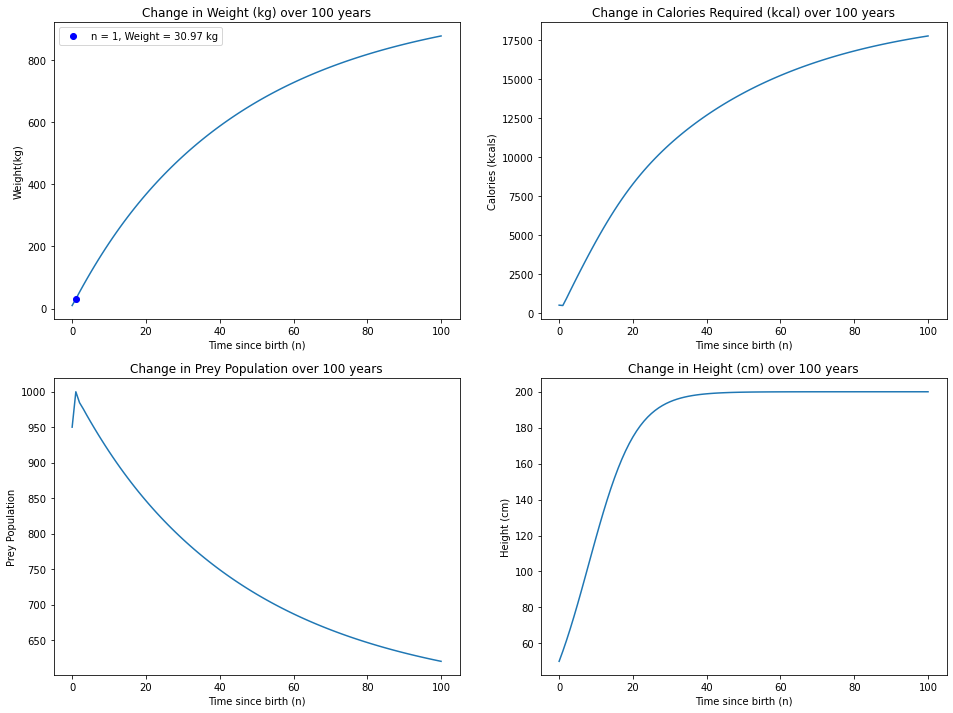

In [72]:
# make a small multiple plot!
plt.figure(figsize = (16,12))

plt.subplot(2,2, 1)
plt.title("Change in Weight (kg) over 100 years")
plt.plot(general['n'], general['W'])
plt.xlabel('Time since birth (n)')
plt.ylabel('Weight(kg)')
plt.plot(general['n'].iloc[1], round(general['W'].iloc[1], 2), 'bo', label = f"n = 1, Weight = {round(general['W'].iloc[1], 2)} kg")
plt.legend()

plt.subplot(2,2, 2)
plt.title("Change in Calories Required (kcal) over 100 years")
plt.plot(general['n'], general['C'])
plt.xlabel('Time since birth (n)')
plt.ylabel('Calories (kcals)')

plt.subplot(2,2, 3)
plt.title("Change in Prey Population over 100 years")
plt.plot(general['n'], general['P'])
plt.xlabel('Time since birth (n)')
plt.ylabel('Prey Population')

plt.subplot(2,2, 4)
plt.title("Change in Height (cm) over 100 years")
plt.plot(general['n'], general['H'])
plt.xlabel('Time since birth (n)')
plt.ylabel('Height (cm)')

In [73]:
d = 1.9 # activity level constant for Dragon A

dragon_A = run_simulation(100, intial)

d = 1.55 # activity level constant for Dragon B

dragon_B = run_simulation(100, intial)

d = 1.2 # activity level constant for Dragon B

dragon_C = run_simulation(100, intial)


d = 1.9 # reset to baseline

In [74]:
labels = ['Dragon A (d = 1.9)', 'Dragon B (d = 1.55)', 'Dragon C (d = 1.25)']
df = [dragon_A, dragon_B, dragon_C]

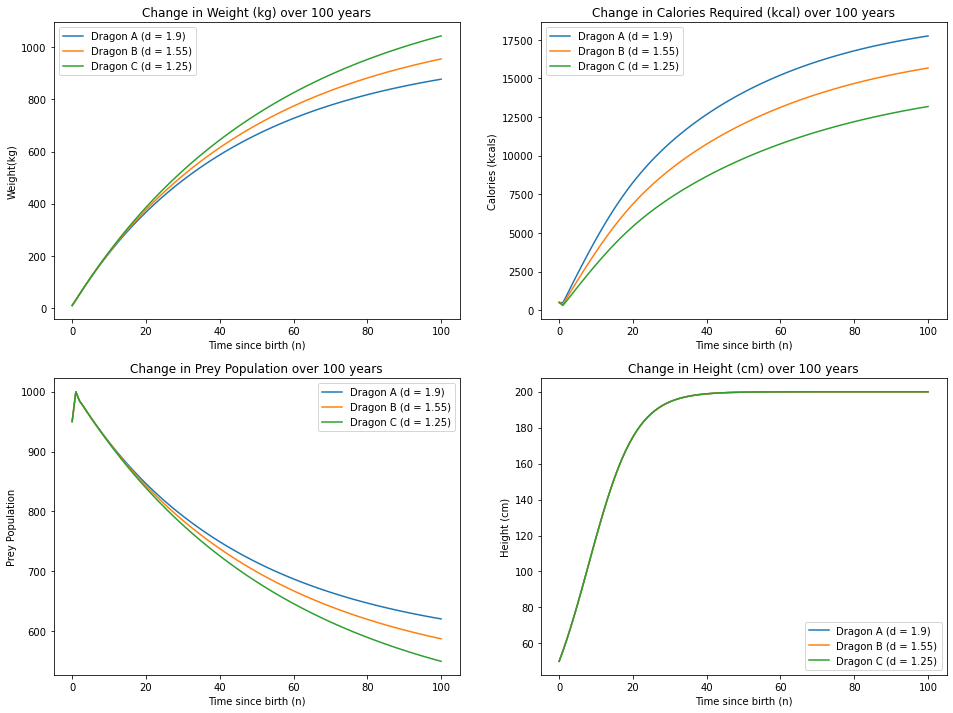

In [75]:
plt.figure(figsize = (16,12))

plt.subplot(2,2, 1)
plt.title("Change in Weight (kg) over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['W'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Weight(kg)')
plt.legend()

plt.subplot(2,2, 2)
plt.title("Change in Calories Required (kcal) over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['C'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Calories (kcals)')
plt.legend()


plt.subplot(2,2, 3)
plt.title("Change in Prey Population over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['P'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Prey Population')
plt.legend()


plt.subplot(2,2, 4)
plt.title("Change in Height (cm) over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['H'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Height (cm)')
plt.legend()


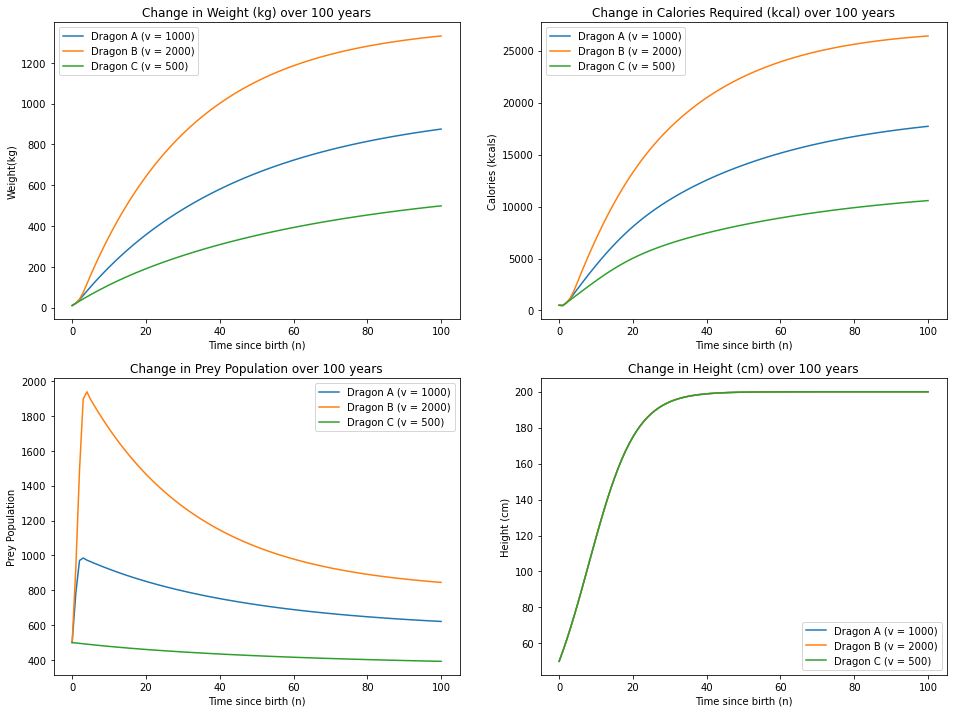

In [76]:
v = 1000 # activity level constant for Dragon A
intial_2 = (0, 10, 500, 500, 50) 


dragon_A = run_simulation(100, intial_2)

v = 2000  # activity level constant for Dragon B

dragon_B = run_simulation(100, intial_2)

v = 500 # activity level constant for Dragon B

dragon_C = run_simulation(100, intial_2)


v = 1000 # reset to baseline

labels = ['Dragon A (v = 1000)', 'Dragon B (v = 2000)', 'Dragon C (v = 500)']
df = [dragon_A, dragon_B, dragon_C]

plt.figure(figsize = (16,12))

plt.subplot(2,2, 1)
plt.title("Change in Weight (kg) over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['W'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Weight(kg)')
plt.legend()

plt.subplot(2,2, 2)
plt.title("Change in Calories Required (kcal) over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['C'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Calories (kcals)')
plt.legend()


plt.subplot(2,2, 3)
plt.title("Change in Prey Population over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['P'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Prey Population')
plt.legend()


plt.subplot(2,2, 4)
plt.title("Change in Height (cm) over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['H'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Height (cm)')
plt.legend()


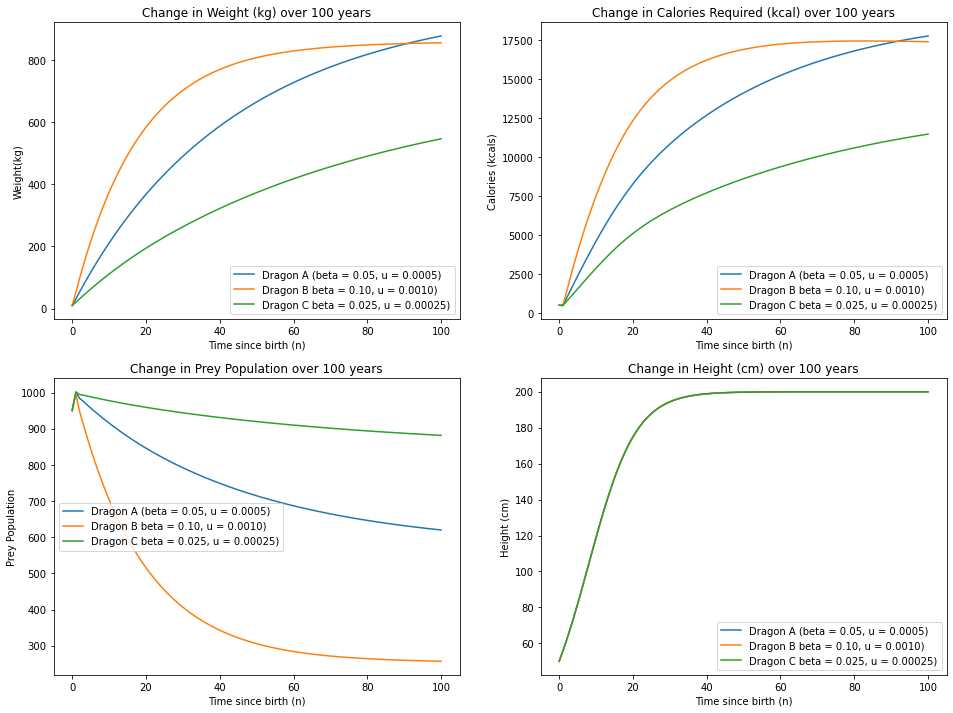

In [77]:
beta = 0.05 # average percentage of population eaten per year
u = 0.0005 # proportionality constant between weight and preys eaten

dragon_A = run_simulation(100, intial)

beta = 0.10 # average percentage of population eaten per year
u = 0.0010   

dragon_B = run_simulation(100, intial)

beta = 0.025 
u = 0.00025  

dragon_C = run_simulation(100, intial)

# reset to baseline
beta = 0.05 # average percentage of population eaten per year
u = 0.0005 # proportionality constant between weight and preys eaten

labels = ['Dragon A (beta = 0.05, u = 0.0005)', 'Dragon B beta = 0.10, u = 0.0010)', 
          'Dragon C beta = 0.025, u = 0.00025)']
df = [dragon_A, dragon_B, dragon_C]

plt.figure(figsize = (16,12))

plt.subplot(2,2, 1)
plt.title("Change in Weight (kg) over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['W'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Weight(kg)')
plt.legend()

plt.subplot(2,2, 2)
plt.title("Change in Calories Required (kcal) over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['C'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Calories (kcals)')
plt.legend()


plt.subplot(2,2, 3)
plt.title("Change in Prey Population over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['P'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Prey Population')
plt.legend()


plt.subplot(2,2, 4)
plt.title("Change in Height (cm) over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['H'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Height (cm)')
plt.legend()


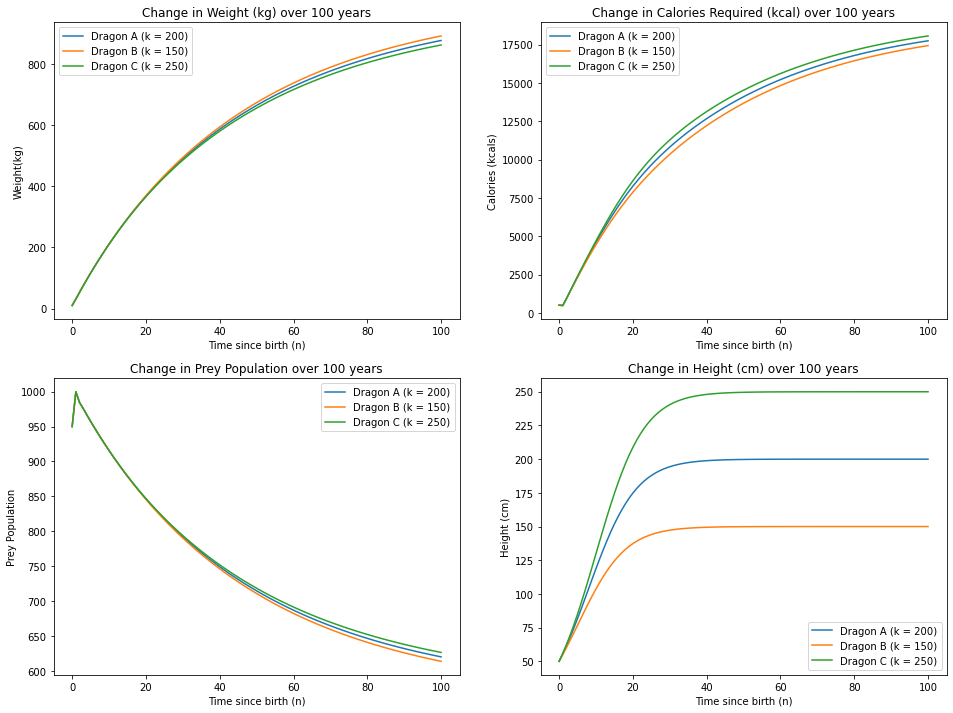

In [78]:
k = 200 # stablizing height in cm 


dragon_A = run_simulation(100, intial)

k = 150  # activity level constant for Dragon B

dragon_B = run_simulation(100, intial)

k = 250 # activity level constant for Dragon B

dragon_C = run_simulation(100, intial)


k = 200 # reset to baseline

labels = ['Dragon A (k = 200)', 'Dragon B (k = 150)', 'Dragon C (k = 250)']
df = [dragon_A, dragon_B, dragon_C]

plt.figure(figsize = (16,12))

plt.subplot(2,2, 1)
plt.title("Change in Weight (kg) over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['W'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Weight(kg)')
plt.legend()

plt.subplot(2,2, 2)
plt.title("Change in Calories Required (kcal) over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['C'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Calories (kcals)')
plt.legend()


plt.subplot(2,2, 3)
plt.title("Change in Prey Population over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['P'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Prey Population')
plt.legend()


plt.subplot(2,2, 4)
plt.title("Change in Height (cm) over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['H'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Height (cm)')
plt.legend()


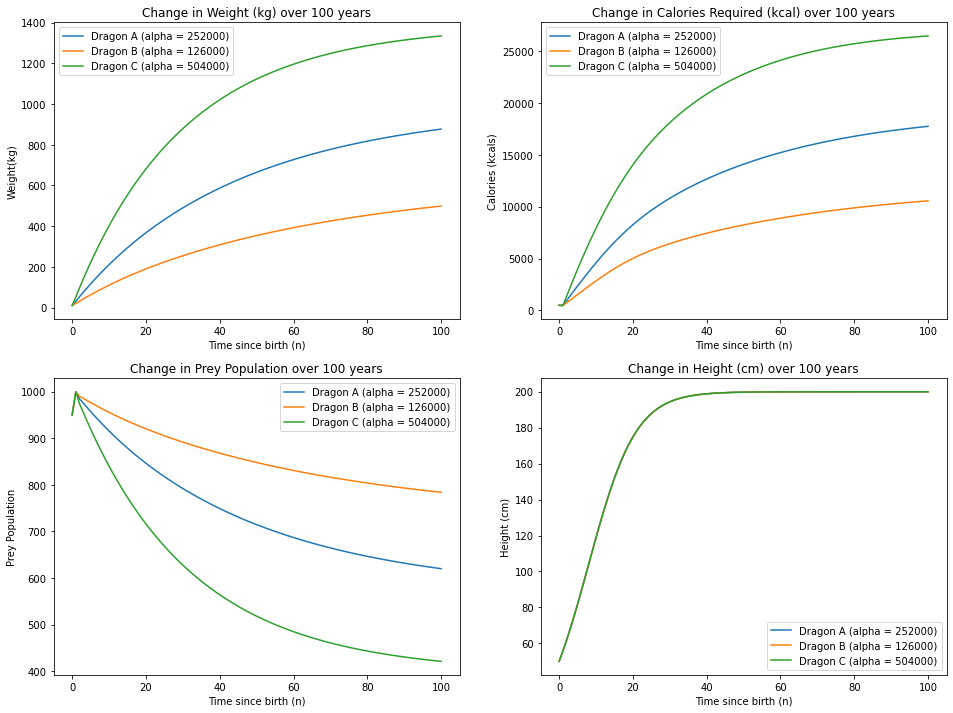

In [79]:
alpha = 252000 # number of calories per prey eaten


dragon_A = run_simulation(100, intial)

alpha = 126000  # number of calories per prey eaten

dragon_B = run_simulation(100, intial)

alpha = 252000 * 2 # number of calories per prey eaten

dragon_C = run_simulation(100, intial)


alpha = 252000 # reset to baseline

labels = ['Dragon A (alpha = 252000)', 'Dragon B (alpha = 126000)', 'Dragon C (alpha = 504000)']
df = [dragon_A, dragon_B, dragon_C]

plt.figure(figsize = (16,12))

plt.subplot(2,2, 1)
plt.title("Change in Weight (kg) over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['W'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Weight(kg)')
plt.legend()

plt.subplot(2,2, 2)
plt.title("Change in Calories Required (kcal) over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['C'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Calories (kcals)')
plt.legend()


plt.subplot(2,2, 3)
plt.title("Change in Prey Population over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['P'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Prey Population')
plt.legend()


plt.subplot(2,2, 4)
plt.title("Change in Height (cm) over 100 years")
for general, label in zip(df, labels):
    plt.plot(general['n'], general['H'], label = label)
plt.xlabel('Time since birth (n)')
plt.ylabel('Height (cm)')
plt.legend()


In [80]:
# Environmental Catastrophe
def run_simulation_EC(timestep, X_0):
    
    columns = ['n','W', 'C', 'P', 'H']
    df = pd.DataFrame(columns = columns, index = range(timestep + 1)) # create dataframe to store results
    df.iloc[0] = X_0
    
    for i in range(1 , timestep + 1):
        # sample from Bernoulli at each time step
        is_disaster = np.random.binomial(n = 1, p = 0.04, size = 1)[0]
        
        if is_disaster == 1:
            # birth rate reduced by 5%
            b -= 0.05
            
            # v is carrying capacity of prey
            v = 100
            # activity constant for dragons
            d *= 0.95 
            
            # fewer prey left so proportion will increase slightly
            beta += 0.07
        else:
            # set all back to baseline
            b = 0.15
            v = 1000
            d = 1.9
            beta = 0.05
        X_0 = f(*X_0)
        X_0 = list(X_0)
        
        for j in range(len(X_0)):
            if X_0[j] < 0:
                X_0[j] = 0
        
        X_0 = tuple(X_0)
        df.iloc[i] = X_0
    return df

In [81]:
initial = (0, 10, 500, 950, 50)
env_stoch = run_simulation_EC(timestep = 100, X_0 = initial)
print(env_stoch.head())

   n          W            C           P          H
0  0         10          500         950         50
1  1  30.970468       477.85     999.875     55.625
2  2  53.073314   933.585765  984.535434  61.648145
3  3  74.536377  1415.564681   975.91838  68.044996
4  4  95.493307  1889.825486   966.57462  74.779154


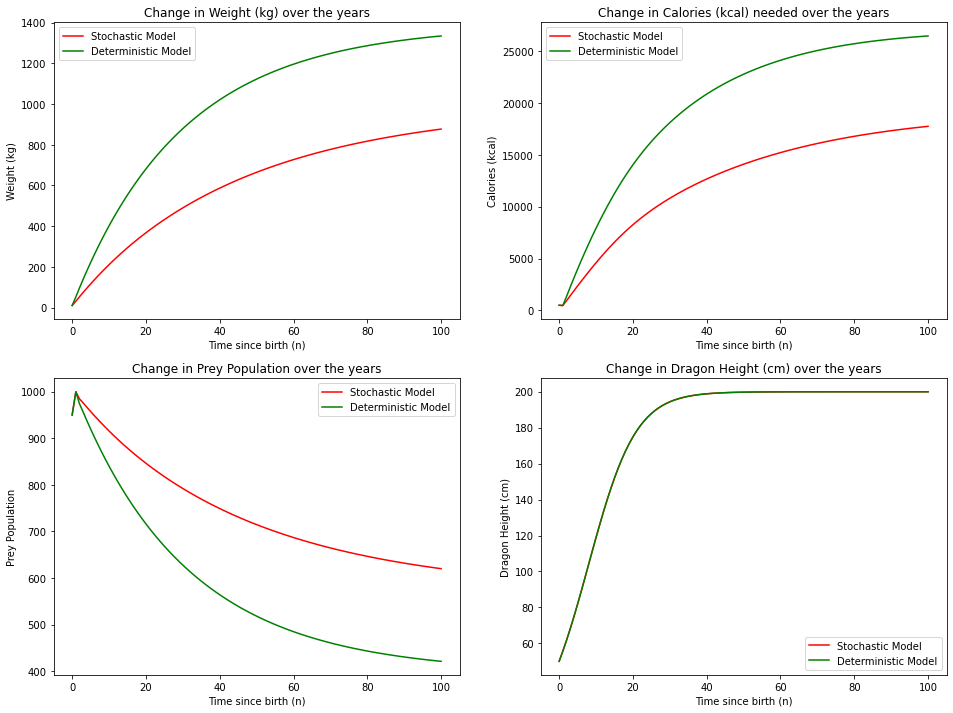

In [82]:
fig, ax = plt.subplots(2, 2, figsize = (16, 12))
ax[0, 0].plot(env_stoch.n, env_stoch.W, c = 'r', label = 'Stochastic Model')
ax[0, 0].plot(general.n, general.W, c = 'g', label = 'Deterministic Model')
ax[0, 0].set_xlabel('Time since birth (n)')
ax[0, 0].set_ylabel('Weight (kg)')
ax[0, 0].set_title('Change in Weight (kg) over the years')
ax[0, 0].legend()

ax[0, 1].plot(env_stoch.n, env_stoch.C, c = 'r', label = 'Stochastic Model')
ax[0, 1].plot(general.n, general.C, c = 'g', label = 'Deterministic Model')
ax[0, 1].set_xlabel('Time since birth (n)')
ax[0, 1].set_ylabel('Calories (kcal)')
ax[0, 1].set_title('Change in Calories (kcal) needed over the years')
ax[0, 1].legend()

ax[1, 0].plot(env_stoch.n, env_stoch.P, c = 'r', label = 'Stochastic Model')
ax[1, 0].plot(general.n, general.P, c = 'g', label = 'Deterministic Model')
ax[1, 0].set_xlabel('Time since birth (n)')
ax[1, 0].set_ylabel('Prey Population')
ax[1, 0].set_title('Change in Prey Population over the years')
ax[1, 0].legend()

ax[1, 1].plot(env_stoch.n, env_stoch.H, c = 'r', label = 'Stochastic Model')
ax[1, 1].plot(general.n, env_stoch.H, c = 'g', label = 'Deterministic Model')
ax[1, 1].set_xlabel('Time since birth (n)')
ax[1, 1].set_ylabel('Dragon Height (cm)')
ax[1, 1].set_title('Change in Dragon Height (cm) over the years')
ax[1, 1].legend();